In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = 'train_'
test_path = 'test_'


In [3]:
import os
from PIL import Image

extensions = []
for fldr in os.listdir(train_path):
    sub_folder_path = os.path.join(train_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
            

In [4]:
for fldr in os.listdir(test_path):
    sub_folder_path = os.path.join(test_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224, 224), # VGG16 input size
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224, 224), # VGG16 input size
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 6131 images belonging to 7 classes.
Found 1122 images belonging to 7 classes.


In [6]:
# Load the VGG16 pre-trained model
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [7]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
num_classes=7

In [9]:
# Build the top layers for the model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)


In [10]:
model = Model(inputs=base_model.input, outputs=outputs)

In [11]:
# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])






In [12]:
# Print model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator)

Epoch 1/15
192/192 [==============================] - 1787s 9s/step - loss: 1.7859 - accuracy: 0.3008 - val_loss: 1.5035 - val_accuracy: 0.3422
Epoch 2/15
192/192 [==============================] - 2077s 11s/step - loss: 1.4087 - accuracy: 0.4019 - val_loss: 1.2206 - val_accuracy: 0.4554
Epoch 3/15
192/192 [==============================] - 2090s 11s/step - loss: 1.3360 - accuracy: 0.4216 - val_loss: 1.3007 - val_accuracy: 0.4020
Epoch 4/15
192/192 [==============================] - 2113s 11s/step - loss: 1.2451 - accuracy: 0.4570 - val_loss: 1.2229 - val_accuracy: 0.5062
Epoch 5/15
192/192 [==============================] - 2084s 11s/step - loss: 1.2150 - accuracy: 0.4696 - val_loss: 1.1788 - val_accuracy: 0.4296
Epoch 6/15
192/192 [==============================] - 2083s 11s/step - loss: 1.2233 - accuracy: 0.4632 - val_loss: 1.1271 - val_accuracy: 0.4875
Epoch 7/15
192/192 [==============================] - 2087s 11s/step - loss: 1.1974 - accuracy: 0.4719 - val_loss: 1.1402 - val_acc

In [16]:
model.save("skindiseases1_.h5")

In [17]:
# Evaluate the model
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

36/36 [==============================] - 327s 9s/step - loss: 1.0608 - accuracy: 0.5392
Test loss: 1.0608136653900146
Test accuracy: 0.5392156839370728


In [18]:
type(history.history['loss'])

list

In [19]:
len(history.history['loss'])

15

In [20]:
history.history['loss'][10:] # show loss for last 5 epochs

[1.1062062978744507,
 1.095423698425293,
 1.0861135721206665,
 1.0659873485565186,
 1.098779559135437]

In [21]:
acc = history.history['accuracy']

In [22]:
acc

[0.30076658725738525,
 0.4018920361995697,
 0.42162778973579407,
 0.45702168345451355,
 0.46958082914352417,
 0.46321970224380493,
 0.4718642830848694,
 0.493557333946228,
 0.4898059070110321,
 0.5022019147872925,
 0.4937204420566559,
 0.5147610306739807,
 0.5134562253952026,
 0.5137824416160583,
 0.508236825466156]

In [23]:
val_acc = history.history['val_accuracy']
val_acc

[0.34224599599838257,
 0.45543670654296875,
 0.4019607901573181,
 0.5062388777732849,
 0.42959001660346985,
 0.48752227425575256,
 0.4893048107624054,
 0.5098039507865906,
 0.5240641832351685,
 0.5516933798789978,
 0.4786096215248108,
 0.4643493890762329,
 0.5623885989189148,
 0.5623885989189148,
 0.5392156839370728]

In [49]:
test_generator.class_indices

{'Acne and Rosacea Photos': 0,
 'Eczema Photos': 1,
 'Melanoma Skin Cancer Nevi and Moles': 2,
 'Normal': 3,
 'Psoriasis pictures Lichen Planus and related diseases': 4,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 5,
 'vitiligo': 6}

In [50]:
class_names = list(train_generator.class_indices.keys())
class_names

['Acne and Rosacea Photos',
 'Eczema Photos',
 'Melanoma Skin Cancer Nevi and Moles',
 'Normal',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'vitiligo']

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 134ms/step


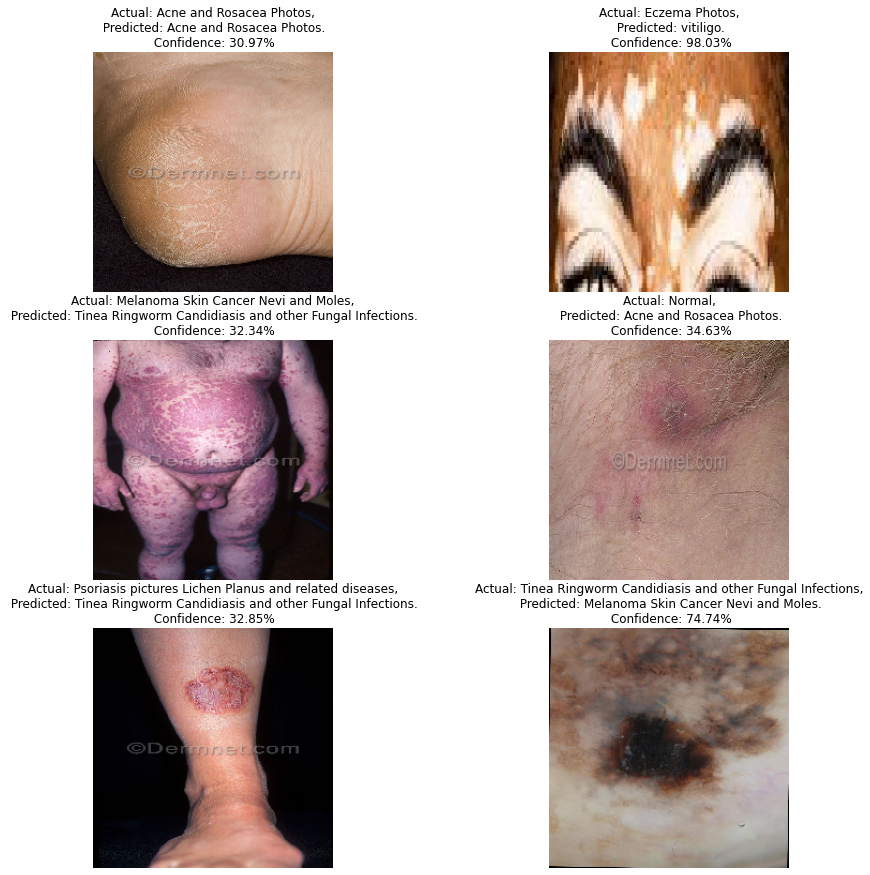

In [57]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 2, i+1 )
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[i]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [58]:
model.save("../skin_diseases_.h5")

Text(0.5, 1.0, 'Training and Validation Accuracy')

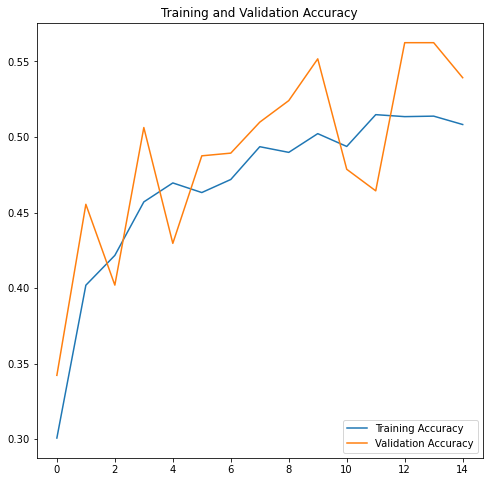

In [61]:
EPOCHS=15
plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



In [64]:
scores = model.evaluate(test_generator)

36/36 [==============================] - 175s 5s/step - loss: 1.0608 - accuracy: 0.5392


In [65]:
scores

[1.060813546180725, 0.5392156839370728]